In [290]:
from numpy import sin,cos ,arange,zeros,empty,array,pi,linspace,meshgrid,sqrt
from numpy.random import normal
from numpy.linalg import norm
from pylab import plot, xlabel, ylabel, show,xlim, ylim,quiver

In [365]:
def f(x,t):
    return(sin(t)-x**3)
def rk4step(h,x,t):
    k1=h*f(x,t)
    k2=h*f(x+.5*k1,t+.5*h)
    k3=h*f(x+.5*k2,t+.5*h)
    k4=h*f(x+k3, t+h)
    x1=(k1+2*k2+2*k3+k4)/6
    return(x1)


In [366]:
rk4step(2*h,0,t+h)

-0.6857663880428442

In [374]:
a=0
b=10
N=10
h=(b-a)/N# and the indicies
delta=.000005
tpoints=[]
xpoints=[]
x=0.0
t=a
xpoints.append(x)
tpoints.append(t)

    
while (t<b): 
    
    
    x1=x+rk4step(h,x,t)
    x1+=rk4step(h,x1,t+h)
    x2=x+rk4step(2*h,x,t)
    rho=30.*h*delta/abs(x1-x2)
    if rho>1:
        tpoints.append(t+2*h)
        xpoints.append(x1)
        
        h=h*rho**.25
        t=t+2*h
        print("increased h",h)
        x=x1
    else:
        h=h*rho**.25
        print("decrease h",h,rho)
    
    
      

decrease h 0.18246887348429597 0.0011085496861700651
increased h 0.26474710176243577
decrease h 0.14219577449876644 0.08321888760146018
increased h 0.15540237061084416
decrease h 0.1372862533328138 0.6090846482925103
increased h 0.13852391445757412
decrease h 0.11332031522408548 0.44784947942690234
increased h 0.11612990853999527
decrease h 0.08793496410290219 0.3287532285328878
increased h 0.09019134660665556
decrease h 0.07810605329541488 0.562444000759635
increased h 0.07869243906412537
decrease h 0.07436897983643781 0.7976920623024616
increased h 0.07448261315325831
decrease h 0.07426247935038222 0.988230283287963
increased h 0.0742644640667755
increased h 0.07677306408067747
increased h 0.08148083336112333
increased h 0.08852576401460271
increased h 0.09871554061370519
increased h 0.11448193252532789
increased h 0.14567046719925045
increased h 0.23953787081068248
decrease h 0.17247320467369123 0.2687755703543549
decrease h 0.164228460487738 0.8220668871616209
decrease h 0.16341099

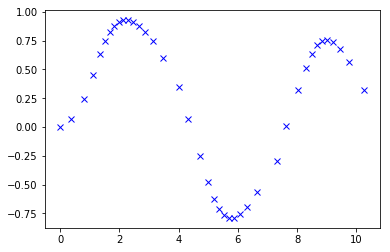

In [375]:
plot(tpoints,xpoints,"bx")
show()

In [178]:
len(tpoints)

35

In [270]:
def acceleration(x,t):
    return(-x-9.8)

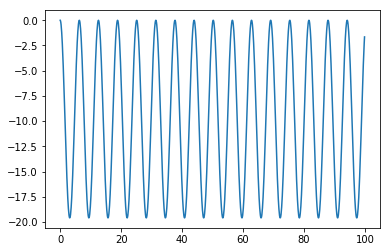

In [268]:
#verlet
t0=0
tf=100
N=1000
h=(tf-t0)/N
tpoints=arange(t0,tf,h)
xpoints=[]
vpoints=[]
x=0
v=0
a=acceleration(0,0)
for t in tpoints:
    xpoints.append(x)
    vpoints.append(v)
    x+=v*h+1/2*a*h**2
    v+=1/2*a*h
    a=acceleration(x,t)
    v+=1/2*a*h
plot(tpoints,xpoints)

show()

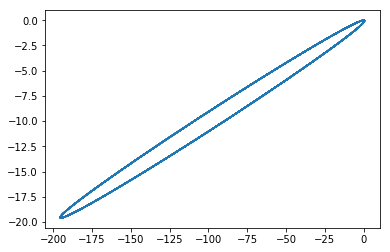

In [269]:
plot(vpoints,xpoints)
show()

In [346]:
def a2(r):
    G=39.478 #AU^3yr^-2Msun^-1
    
    return(-G*r/norm(r)**3)

In [363]:
a=0
b=30

h=1/8760 #hour
tpoints=arange(a,b,h)
N=len(tpoints)
rpoints=zeros([2,N],float)
vpoints=zeros([2,N],float)

r=array([1,0])
v=array([0,6.39])
rpoints[:,0]=r
vpoints[:,0]=v
vhalf=1/2*h*a(r)
for i in range(N):
    
    rpoints[i+1]=rpoints[i]+h*
    v+=1/2*a*h
    
    v+=1/2*a*h
    #r_new = r + v*h + a2(r)*h**2/2
    #v_new = v + (a2(r) + a2(r_new))/2 * h
    rpoints[:, i] = r
    vpoints[:, i] = v
    #r=r_new
    #v=v_new
print("done")

SyntaxError: invalid syntax (<ipython-input-363-de1be3452d9e>, line 17)

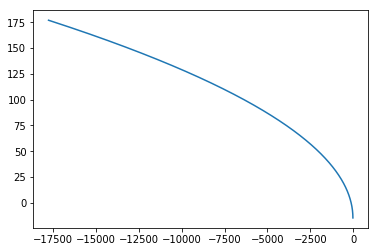

In [360]:
plot(rpoints[0,:],rpoints[1,:])

show()

In [339]:
from numpy import array,arange

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/100
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

E = 134.28637169369105 eV


In [334]:
e

1.6022e-19